In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic_data = sns.load_dataset('titanic')

 pclass : 승객 등급 

• survived : 생존여부 (생존 :1 , 아닌 경우 : 0) 

• sex : 승객 성별 

• age : 승객 나이 

• sibsp: 동승한 형제 또는 배우자 수 

• parch : 동승한 부모 또는 자녀수 

• fare : 승객 지불 요금 

• cabin : 선실 이름 

• embarked : 승선항 ( C= 쉘 부르크, Q= 퀸즈타운, S=사우스 햄튼 

• body :사망자 확인 번호 

• home.dest:고향/목적지

In [4]:
titanic_data["alone"] = titanic_data["alone"].astype('int64')
titanic_data["embarked"] = titanic_data["embarked"].astype('str')
titanic_data = titanic_data.drop(["deck"],axis=1)

## 타이타닉 데이터 정보

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null int64
dtypes: bool(1), category(1), float64(2), int64(5), object(5)
memory usage: 85.5+ KB


In [6]:
titanic_data.head(n=10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,0


## 유일한 값 개수 구하기

In [7]:
n = titanic_data['embarked']

In [8]:
n.value_counts()

S      644
C      168
Q       77
nan      2
Name: embarked, dtype: int64

In [9]:
np.unique(n)

array(['C', 'Q', 'S', 'nan'], dtype=object)

### 이상치 분석

Before Clearing Outlier |mean-median|: 18.921401404494322
After Clearing Outlier |mean-median|: 3.2521773831775764


/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


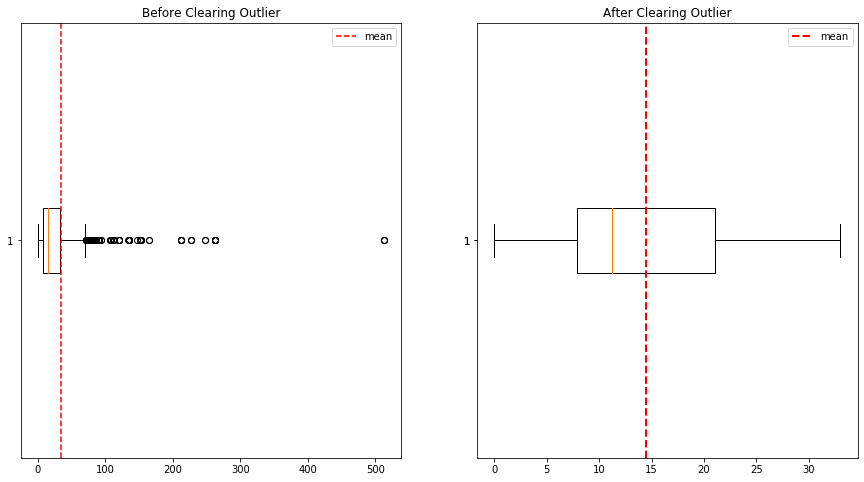

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Before Clearing Outlier')
plt.boxplot(titanic_data.dropna()['fare'],vert=0)
plt.axvline(np.mean(titanic_data.dropna()['fare']),color='r',label='mean',linestyle='--')
plt.legend()
print('Before Clearing Outlier |mean-median|:',
      np.mean(titanic_data.dropna()['fare'])-np.median(titanic_data.dropna()['fare']))

plt.subplot(1,2,2)
plt.title('After Clearing Outlier')
quartile = np.percentile(titanic_data.dropna()['fare'],[0,25,50,75,100])
data = (titanic_data.dropna()[titanic_data.fare<=quartile[3]])['fare']
plt.boxplot(data,vert=0)
plt.boxplot(data,vert=0)
plt.axvline(np.mean(data),color='r',linestyle='--',lw=2.0,label='mean')
plt.legend()
print('After Clearing Outlier |mean-median|:',
      np.mean(data)-np.median(data))
plt.show()

> ## 그래프 분석
**이상치 제거 전 평균과 중위값의 차이: 18.9214**<br>
**이상치 제거 후 평균과 중위값의 차이: 3.25217**<br>
    - 이렇게 이상치를 빼면 평균과 중위값의 차이가 줄어드는 것을 알 수 있다.
    - 평균은 이상치에 대해 민감하기 때문에 이러한 결과가 발생하는 것이다.
    

### 이상치 데이터 분석
- 이상치만 가지는 데이터그룹과 이상치를 가지지않는 데이터그룹을 나누어서 분석하겠다.
- embark_town속성으로 그룹을 지어서 분석하겠다.

In [11]:
n = (titanic_data.dropna()[titanic_data.fare>100].groupby(['embark_town']))
n.describe()['pclass']

/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
embark_town,,,,,,,,
Cherbourg,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Southampton,22.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


fare>100이상인 곳은 Cherbourg과 Southampton이고, pclass의 평균이 1이다. 이경우 거의 대부분이 first_class라는 것을 의미한다.

In [12]:
n.get_group('Cherbourg').loc[:,["embark_town","pclass"]]

,embark_town,pclass
118,Cherbourg,1
195,Cherbourg,1
215,Cherbourg,1
258,Cherbourg,1
299,Cherbourg,1
307,Cherbourg,1
311,Cherbourg,1
319,Cherbourg,1
325,Cherbourg,1
337,Cherbourg,1


In [13]:
n.get_group('Southampton').loc[:,["embark_town","pclass"]]

,embark_town,pclass
27,Southampton,1
88,Southampton,1
268,Southampton,1
269,Southampton,1
297,Southampton,1
305,Southampton,1
318,Southampton,1
332,Southampton,1
341,Southampton,1
390,Southampton,1


Cherbourg과 Southampthon이다. 그리고 여기에 속한 사람들 모두는 first_class이다.Queenstown은 이 범주에 속하지 않는다. 따라서, Queenstown은 못사는 마을일 확률이 더 높다. 하지만 아직 확신할 수 없으니 더 분석해보자.

In [14]:
n = titanic_data.dropna()[titanic_data.fare<=100].groupby(['embark_town'])
n.describe()['pclass']

/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
embark_town,,,,,,,,
Cherbourg,104.0,1.932692,0.927094,1.0,1.0,2.0,3.0,3.0
Queenstown,28.0,2.785714,0.568112,1.0,3.0,3.0,3.0,3.0
Southampton,532.0,2.383459,0.748853,1.0,2.0,3.0,3.0,3.0


Queenstown의 pclass 평균은 2.785이다. 이럴 경우 class가 3일 경우가 많다는 것이다.

In [15]:
d = n.get_group('Queenstown')
print('Queenstown의 class가 3일 경우:',d[d['pclass']==3].count()['pclass'])

Queenstown의 class가 3일 경우: 24


Queenstown의 class가 3일 경우는 24명이다. 타이타닉호에 많이 탄 마을도 아니고 class가 3이 경우가 많은걸 보아서Queenstown 마을은 부유한 마을은 아닐 것을 예측 할 수 있다.

## 타이타닉 데이터 분석

### 동행자 수
- sibsp : 동승한 형제 또는 배우자 수 
- parch : 동승한 부모 또는 자녀수 
- alone : 혼자 
- family_size = sibsp+parch
- 전체적으로 사람의 수가 다르기 때문에 전체적으로 비교하는 것보다, 특정 집단별로 나누어 보는 것이 더 나을거 같다

In [12]:
accompany = titanic_data.loc[:,["sibsp","parch","alone"]].sum().values
print("sibsp: ",accompany[0])
print('parch: ',accompany[1])
print('alone: ',accompany[2])

sibsp:  466
parch:  340
alone:  537


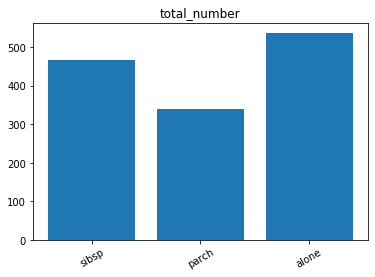

In [13]:
ax = plt.subplot()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['sibsp','parch','alone'], rotation=30)
plt.bar(range(len(accompany)),accompany)
plt.title("total_number")
plt.show()

In [14]:
print("생존")
accompany_survived = titanic_data[(titanic_data["alive"]=='yes')].loc[:,["sibsp","parch","alone"]].sum().values
print('sibsp: ',accompany_survived[0])
print('parch: ',accompany_survived[1])
print('alone: ',accompany_survived[2])

생존
sibsp:  162
parch:  159
alone:  163


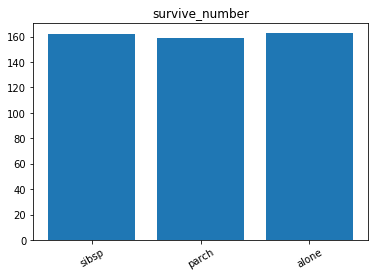

In [15]:
ax = plt.subplot()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['sibsp','parch','alone'], rotation=30)
plt.bar(range(len(accompany_survived)),accompany_survived)
plt.title("survive_number")
plt.show()

In [16]:
print("사망")
accompany_died = titanic_data[(titanic_data["alive"]=='no')].loc[:,["sibsp","parch","alone"]].sum().values
print('sibsp: ',accompany_died[0])
print('parch: ',accompany_died[1])
print('alone: ',accompany_died[2])

사망
sibsp:  304
parch:  181
alone:  374


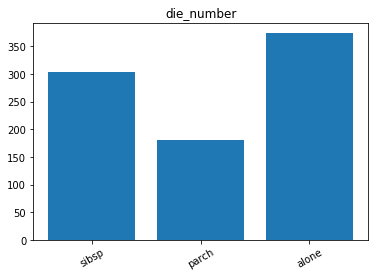

In [17]:
ax = plt.subplot()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['sibsp','parch','alone'], rotation=30)
plt.bar(range(len(accompany_died)),accompany_died)
plt.title("die_number")
plt.show()

In [18]:
print("family_size에서 생존할 확률:",(accompany_survived[0]+accompany_survived[1])/(accompany[0]+accompany[1]))
print("family_size에서 사망할 확률:",(accompany_died[0]+accompany_died[1])/(accompany[0]+accompany[1]))
print('=====================')
print("alone에서 생존할 확률:",(accompany_survived[2]/accompany[2]))
print("alone에서 사망할 확률:",(accompany_died[2]/accompany[2]))

family_size에서 생존할 확률: 0.39826302729528534
family_size에서 사망할 확률: 0.6017369727047146
alone에서 생존할 확률: 0.30353817504655495
alone에서 사망할 확률: 0.6964618249534451


family_size가 alone 보다 생존할 확률 9% 더 높다. 하지만 확률은 어떤한 여러가지 요인에 확률의 값을 변화 시킨다. 따라서 10%의 차이는 구분하기위해 딱히 큰 차이가 아니다.따라서 각각 따로따로 보겠다.

In [19]:
print("어떤집단에서 사망할 퍼센트")
s = accompany_died[0]/accompany[0]
p = accompany_died[1]/accompany[1]
a = accompany_died[2]/accompany[2]
print('sibsp: ',s)
print('parch: ',p)
print('alone: ',a)

어떤집단에서 사망할 퍼센트
sibsp:  0.6523605150214592
parch:  0.5323529411764706
alone:  0.6964618249534451


In [20]:
print("어떤집단에서 생존할 퍼센트")
ss = accompany_survived[0]/accompany[0]
pp = accompany_survived[1]/accompany[1]
aa = accompany_survived[2]/accompany[2]
print('sibsp: ',ss)
print('parch: ',pp)
print('alone: ',aa)

어떤집단에서 생존할 퍼센트
sibsp:  0.34763948497854075
parch:  0.4676470588235294
alone:  0.30353817504655495


In [21]:
print("전체에서 사망할 퍼센트")
sss = accompany_died[0]/accompany.sum()
ppp = accompany_died[1]/accompany.sum()
aaa = accompany_died[2]/accompany.sum()
print('sibsp: ',sss)
print('parch: ',ppp)
print('alone: ',aaa)

전체에서 사망할 퍼센트
sibsp:  0.22635889798957556
parch:  0.1347728965003723
alone:  0.27848101265822783


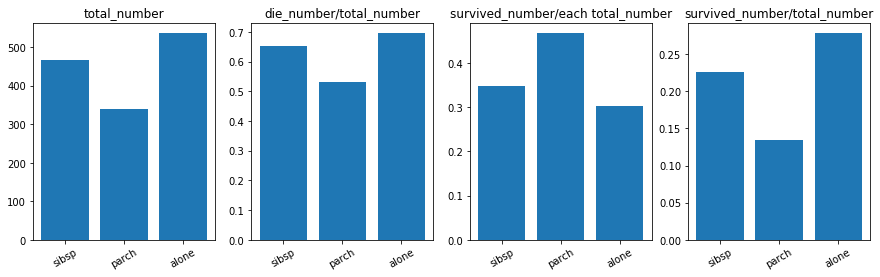

In [23]:
plt.figure(figsize=(15,4))
ax = plt.subplot(1,4,1)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['sibsp','parch','alone'], rotation=30)
plt.bar(range(len(accompany)),accompany)
plt.title("total_number")

ax = plt.subplot(1,4,2)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['sibsp','parch','alone'], rotation=30)
plt.bar(range(len([s,p,a])),[s,p,a])
plt.title("die_number/total_number")

ax = plt.subplot(1,4,3)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['sibsp','parch','alone'], rotation=30)
plt.bar(range(len([ss,pp,aa])),[ss,pp,aa])
plt.title("survived_number/each total_number")

ax = plt.subplot(1,4,4)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['sibsp','parch','alone'], rotation=30)
plt.bar(range(len([sss,ppp,aaa])),[sss,ppp,aaa])
plt.title("survived_number/total_number")
plt.show()

위에 그래프에서 전반적으로 parch 즉 부모또는 자식을 데리고 온 사람은 생존할 확률이 높다. 내 생각엔 parch의 경우 자식을 데려온 사람으로써 홀로온 사람보다 경제적으로 부유한 사람일 경우가 높다. 그리고 아이들은 어리기 때문에 구명보트에 탈 확률이 높아진다. 따라서 parch가 sibsp(형제,배우자), alone(혼자)보다 생존률이 높다. 그리고 하나더 말하자면 alone(혼자)는 전반적으로 부유하지 않을 확률이 높지 않기 떄문에 살 확률이 떨어진다.

### 성별
- 남자, 여자, 아이들(who)로 구분하겠다. 

In [27]:
total_who_data = titanic_data.loc[:,["who"]]
total_man = (total_who_data.values == "man").sum()
total_woman = (total_who_data.values == "woman").sum()
total_child = (total_who_data.values == "child").sum()
print("전체 성인남자 수:",total_man)
print("전체 성인여자 수:",total_woman)
print("전체 아이들 수:",total_child)

전체 성인남자 수: 537
전체 성인여자 수: 271
전체 아이들 수: 83


In [28]:
who_survive_data = titanic_data[(titanic_data["alive"]=='yes')].loc[:,["who"]]
who_die_data = titanic_data[(titanic_data["alive"]=='no')].loc[:,["who"]]

In [29]:
print("생존한 수:", who_survive_data.count()[0])
print("사망한 수:",who_die_data.count()[0])

생존한 수: 342
사망한 수: 549


In [30]:
survive_man = (who_survive_data.values == 'man').sum()
survive_woman = (who_survive_data.values == 'woman').sum()
survive_child = (who_survive_data.values == 'child').sum()

print("각각의 생존수")
print("남자 수:",survive_man)
print("여자 수:",survive_woman)
print("아이들 수:",survive_child)

각각의 생존수
남자 수: 88
여자 수: 205
아이들 수: 49


In [31]:
die_man = (who_die_data.values == 'man').sum()
die_woman= (who_die_data.values == 'woman').sum()
die_child = (who_die_data.values == 'child').sum()

print("각각의 사망수")
print("남자 수:",die_man)
print("여자 수:",die_woman)
print("아이들 수:",die_child)

각각의 사망수
남자 수: 449
여자 수: 66
아이들 수: 34


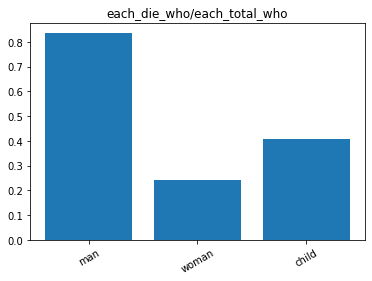

In [32]:
each_who_die = [(die_man/total_man), (die_woman/total_woman), (die_child/total_child)]
ax = plt.subplot()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['man','woman','child'], rotation=30)
plt.bar(range(len(each_who_die)),each_who_die)
plt.title("each_die_who/each_total_who")
plt.show()

위의 그래프로 알 수 있듯이 남자의 사망확률이 압도적으로 높다. 한 유명한 일화로 "여성과 아이부터"라는 말이 있다. 하지만 실제로는 그렇지 않다. http://www.munhwa.com/news/view.html?no=20140420MW131021755563 뉴스에 의하면 1852년부터 2011년까지 세계 30개국에서 일어난 해상 사고를 분석한 조사에서 사고 시 가장 생존률이 높은 사람들은 다름아닌 선장과 승무원으로 드러났다. 왜 타이타닉 호에서는 여자와 아이들의 생존률이 높았을 까?. 타이타닉 사고 당시 여성 생존자가 많은 것은 선장의 책임감 있는 리더십 때문으로 분석되어진다. 당시 타이타닉호 선장이었던 에드워드 존 스미스는 승객 중에서 어린이, 여자, 남자 순으로 탈출토록 했고, 총으로 공포를 쏘면서 이성을 잃은 사람들이 질서를 유지하도록 하게 했으며, 배와 운명을 함께 하는 직업의식과 책임감을 보였다.

In [33]:
total_pclass = titanic_data.loc[:,["pclass"]]

In [34]:
total_fist_class = (total_pclass.values == 1).sum()
total_second_class = (total_pclass.values == 2).sum()
total_third_class = (total_pclass.values == 3).sum()

In [35]:
print("전체 class 수:",total_pclass.count()[0])
print("first_class:",total_fist_class)
print("second_class:",total_second_class)
print("third_class:",total_third_class)

전체 class 수: 891
first_class: 216
second_class: 184
third_class: 491


In [36]:
total_survive_pclass = titanic_data[(titanic_data["alive"]=='yes')].loc[:,["pclass"]].values

In [37]:
total_die_pclass = titanic_data[(titanic_data["alive"]=='no')].loc[:,["pclass"]].values

In [38]:
print("전체 class 생존수:",len(total_survive_pclass),"\n")
print("클래스별 생존수")
print("first_class:",(total_survive_pclass == 1).sum())
print("second_class:",(total_survive_pclass == 2).sum())
print("third_class:",(total_survive_pclass == 3).sum())

print("\n")
print("클래스별 사망수")
first_die = (total_die_pclass == 1).sum()
second_die = (total_die_pclass == 2).sum()
third_die = (total_die_pclass == 3).sum()
print("first_class:",first_die)
print("second_class:",second_die)
print("third_class:",third_die)

전체 class 생존수: 342 

클래스별 생존수
first_class: 136
second_class: 87
third_class: 119


클래스별 사망수
first_class: 80
second_class: 97
third_class: 372


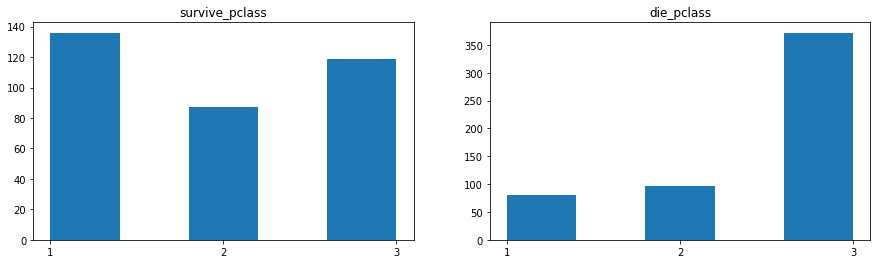

In [39]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(total_survive_pclass.squeeze(),bins=5)
plt.xticks([1,2,3])
plt.title("survive_pclass")

plt.subplot(1,2,2)
plt.hist(total_die_pclass.squeeze(),bins=5)
plt.xticks([1,2,3])
plt.title("die_pclass")
plt.show()

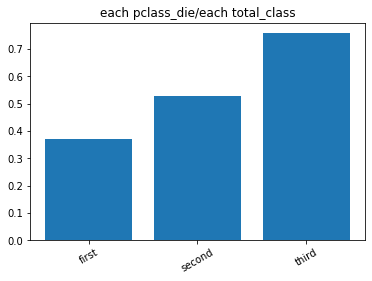

In [40]:
die_pclass =  [first_die/total_fist_class,second_die/total_second_class,third_die/total_third_class]
ax = plt.subplot()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['first','second','third'], rotation=30)
plt.bar(range(len(die_pclass)),die_pclass)
plt.title("each pclass_die/each total_class")
plt.show()

### 나이별로 구분

생존한 수: 342


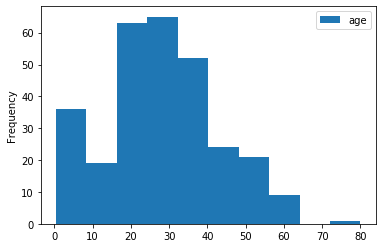

In [41]:
print("생존한 수:",titanic_data[(titanic_data["alive"]=='yes')].count()["alive"])
titanic_data[(titanic_data["alive"]=='yes')].loc[:,["age"]].plot(kind='hist')
plt.show()

사망한 수: 549


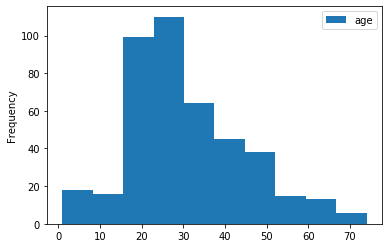

In [42]:
print("사망한 수:",titanic_data[(titanic_data["alive"]=='no')].count()["alive"])
titanic_data[(titanic_data["alive"]=='no')].loc[:,["age"]].plot(kind='hist')
plt.show()

                 survived  pclass  sex  age  sibsp  parch  fare  embarked  \
age                                                                         
(0.34, 20.315]         82      82   82   82     82     82    82        82   
(20.315, 40.21]       153     153  153  153    153    153   153       153   
(40.21, 60.105]        50      50   50   50     50     50    50        50   
(60.105, 80.0]          5       5    5    5      5      5     5         5   

                 class  who  adult_male  embark_town  alive  alone  
age                                                                 
(0.34, 20.315]      82   82          82           82     82     82  
(20.315, 40.21]    153  153         153          152    153    153  
(40.21, 60.105]     50   50          50           50     50     50  
(60.105, 80.0]       5    5           5            4      5      5  


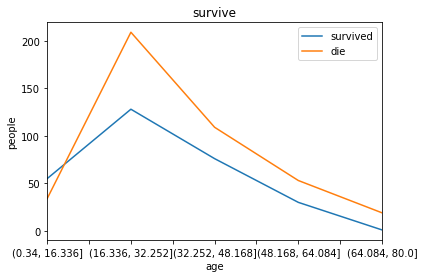

In [43]:
gg = titanic_data[titanic_data["alive"]=="yes"]
t = pd.cut(gg.age,4)
g = gg.groupby(t)
print(g.count())

## survive
gg = titanic_data[titanic_data["alive"]=="yes"]
t = pd.cut(gg.age,5)
g = gg.groupby(t)
g.count()['survived'].plot(title="survive")

## die
gg = titanic_data[titanic_data["alive"]=="no"]
t = pd.cut(gg.age,5)
g = gg.groupby(t)
plt.plot(g.count()['survived'].values,label="die")
plt.ylabel('people')

plt.legend()

In [44]:
print("아이들(남,여) 나이 범위")
print(np.unique(titanic_data[titanic_data.who=="child"]['age'].values))

아이들(남,여) 나이 범위
[ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.  ]


In [45]:
print("성인 여자 범위")
print(np.unique(titanic_data[titanic_data.who=="woman"]['age'].dropna(axis=0).values))

성인 여자 범위
[16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
 30.  30.5 31.  32.  32.5 33.  34.  35.  36.  37.  38.  39.  40.  41.
 42.  43.  44.  45.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
 57.  58.  60.  62.  63. ]


In [46]:
print("성인 남자 범위")
print(np.unique(titanic_data[titanic_data.who=="man"]['age'].dropna(axis=0).values))

성인 남자 범위
[16.  17.  18.  19.  20.  20.5 21.  22.  23.  23.5 24.  24.5 25.  26.
 27.  28.  28.5 29.  30.  30.5 31.  32.  32.5 33.  34.  34.5 35.  36.
 36.5 37.  38.  39.  40.  40.5 41.  42.  43.  44.  45.  45.5 46.  47.
 48.  49.  50.  51.  52.  54.  55.  55.5 56.  57.  58.  59.  60.  61.
 62.  64.  65.  66.  70.  70.5 71.  74.  80. ]


## Machine_Learning
- 생존 확률
- 나이

In [47]:
preprocessed_data = titanic_data.loc[:,['survived', 'pclass','age',
                                       'sibsp', 'parch','alone','fare','embarked','who']]

In [48]:
preprocessed_data.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
alone         0
fare          0
embarked      0
who           0
dtype: int64

In [49]:
preprocessed_data = preprocessed_data.dropna()

In [50]:
preprocessed_data.dtypes

survived      int64
pclass        int64
age         float64
sibsp         int64
parch         int64
alone         int64
fare        float64
embarked     object
who          object
dtype: object

In [51]:
preprocessed_data.count()

survived    714
pclass      714
age         714
sibsp       714
parch       714
alone       714
fare        714
embarked    714
who         714
dtype: int64

In [52]:
preprocessed_data.loc[preprocessed_data["embarked"]=="nan"]

,survived,pclass,age,sibsp,parch,alone,fare,embarked,who
61,1,1,38.0,0,0,1,80.0,nan,woman
829,1,1,62.0,0,0,1,80.0,nan,woman


진짜 NaN값이 아니라, nan이라는 이름을 가진 문자열 값

In [53]:
preprocessed_data = preprocessed_data.drop(labels=[61,829])

In [54]:
preprocessed_data.loc[preprocessed_data["embarked"]=="nan"]

,survived,pclass,age,sibsp,parch,alone,fare,embarked,who


get_dummies : one_hot 인코딩, 문자열 or object만 변환 

In [55]:
preprocessed_data = pd.get_dummies(preprocessed_data)

In [56]:
preprocessed_data.head()

,survived,pclass,age,sibsp,parch,alone,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,1,0,0,7.2500,0,0,1,0,1,0
1,1,1,38.0,1,0,0,71.2833,1,0,0,0,0,1
2,1,3,26.0,0,0,1,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,1,8.0500,0,0,1,0,1,0


속성 fare, age은 다른 것들에 비해 값이 크고 연속형 데이터이기 때문에 정규화를 해줄것이다.

In [57]:
preprocessed_data["fare"] = (preprocessed_data["fare"] - preprocessed_data["fare"].mean())/(preprocessed_data["fare"].std())

In [58]:
preprocessed_data["age"] = (preprocessed_data["age"] - preprocessed_data["age"].mean())/(preprocessed_data["age"].std())

(array([29., 17., 15.,  7., 14., 56., 41., 67., 72., 65., 64., 49., 39.,
        35., 27., 26., 15., 23., 12., 11.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 20 Patch objects>)

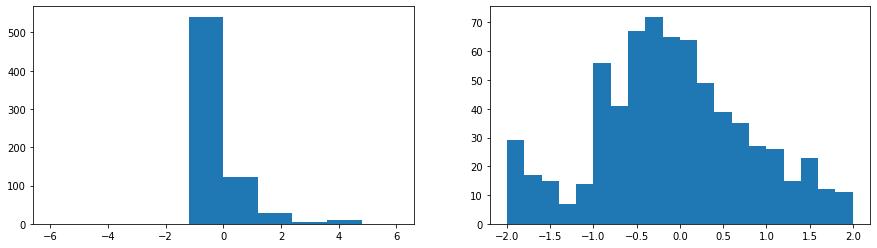

In [59]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(preprocessed_data["fare"],bins=10,range=(-6,6))
plt.subplot(1,2,2)
plt.hist(preprocessed_data["age"],bins=20,range=(-2,2))

In [60]:
np.sort(preprocessed_data["fare"])

array([-6.52968155e-01, -6.52968155e-01, -6.52968155e-01, -6.52968155e-01,
       -6.52968155e-01, -6.52968155e-01, -6.52968155e-01, -5.77172868e-01,
       -5.58519200e-01, -5.35143083e-01, -5.31365125e-01, -5.31129003e-01,
       -5.30263850e-01, -5.30263850e-01, -5.25462065e-01, -5.25462065e-01,
       -5.21211862e-01, -5.21211862e-01, -5.19874465e-01, -5.19795128e-01,
       -5.19795128e-01, -5.19795128e-01, -5.19795128e-01, -5.19795128e-01,
       -5.19795128e-01, -5.19715791e-01, -5.19715791e-01, -5.18378394e-01,
       -5.18378394e-01, -5.18378394e-01, -5.18378394e-01, -5.18062934e-01,
       -5.16489415e-01, -5.16489415e-01, -5.16489415e-01, -5.16489415e-01,
       -5.16489415e-01, -5.16489415e-01, -5.16410077e-01, -5.16410077e-01,
       -5.16410077e-01, -5.16410077e-01, -5.16410077e-01, -5.16410077e-01,
       -5.16410077e-01, -5.16410077e-01, -5.16017170e-01, -5.16017170e-01,
       -5.16017170e-01, -5.16017170e-01, -5.16017170e-01, -5.16017170e-01,
       -5.16017170e-01, -

In [61]:
preprocessed_data.head()

,survived,pclass,age,sibsp,parch,alone,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,-0.527298,1,0,0,-0.516017,0,0,1,0,1,0
1,1,1,0.576688,1,0,0,0.693558,1,0,0,0,0,1
2,1,3,-0.251301,0,0,1,-0.503267,0,0,1,0,0,1
3,1,1,0.369691,1,0,0,0.350080,0,0,1,0,0,1
4,0,3,0.369691,0,0,1,-0.500905,0,0,1,0,1,0


In [62]:
print("총 sample의 개수:",preprocessed_data.count()[0])
print("train 개수:",512)
print("validation 개수:",100)
print("test개수:",100)

총 sample의 개수: 712
train 개수: 512
validation 개수: 100
test개수: 100


In [63]:
data = preprocessed_data.iloc[:,1:].values
label = preprocessed_data["survived"].values

In [64]:
train_data = data[:512]
valid_data = data[512:612]
test_data = data[612:]

train_label = label[:512]
valid_label = label[512:612]
test_label = label[612:]

In [65]:
print("train_size:",train_data.shape)
print("valid_size:",valid_data.shape)
print("test_size:",test_data.shape)

train_size: (512, 12)
valid_size: (100, 12)
test_size: (100, 12)


In [66]:
train_size = train_data.shape[1]
batch_size = 128
learning_rate = 0.0003

In [67]:
print("train_size:",train_label.shape)
print("valid_size:",valid_label.shape)
print("test_size:",test_label.shape)

train_size: (512,)
valid_size: (100,)
test_size: (100,)


### training

In [68]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow as tf

In [76]:
model = models.Sequential()

In [77]:
model.add(layers.Dense(144,activation='relu',input_shape=(train_size,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [78]:
print("parameter(weight)개수")
for i in range(len(model.weights)):
    print(model.weights[i].shape)

parameter(weight)개수
(12, 144)
(144,)
(144, 64)
(64,)
(64, 12)
(12,)
(12, 1)
(1,)


In [79]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy']
)

In [80]:
history = model.fit(train_data,train_label,epochs=60,batch_size=batch_size,
                    validation_data=(valid_data,valid_label))

Train on 512 samples, validate on 100 samples
Epoch 1/60
512/512 [==============================] - 0s 572us/sample - loss: 0.7248 - accuracy: 0.3965 - val_loss: 0.7149 - val_accuracy: 0.3200
Epoch 2/60
512/512 [==============================] - 0s 19us/sample - loss: 0.6958 - accuracy: 0.4766 - val_loss: 0.6830 - val_accuracy: 0.5600
Epoch 3/60
512/512 [==============================] - 0s 19us/sample - loss: 0.6706 - accuracy: 0.6406 - val_loss: 0.6568 - val_accuracy: 0.6600
Epoch 4/60
512/512 [==============================] - 0s 19us/sample - loss: 0.6530 - accuracy: 0.6504 - val_loss: 0.6358 - val_accuracy: 0.6500
Epoch 5/60
512/512 [==============================] - 0s 22us/sample - loss: 0.6374 - accuracy: 0.6484 - val_loss: 0.6185 - val_accuracy: 0.6400
Epoch 6/60
512/512 [==============================] - 0s 21us/sample - loss: 0.6259 - accuracy: 0.6621 - val_loss: 0.6043 - val_accuracy: 0.6800
Epoch 7/60
512/512 [==============================] - 0s 24us/sample - loss: 0.6148

Epoch 57/60
512/512 [==============================] - 0s 20us/sample - loss: 0.4123 - accuracy: 0.8203 - val_loss: 0.4014 - val_accuracy: 0.8100
Epoch 58/60
512/512 [==============================] - 0s 19us/sample - loss: 0.4118 - accuracy: 0.8184 - val_loss: 0.4022 - val_accuracy: 0.8100
Epoch 59/60
512/512 [==============================] - 0s 19us/sample - loss: 0.4107 - accuracy: 0.8242 - val_loss: 0.4024 - val_accuracy: 0.8100
Epoch 60/60
512/512 [==============================] - 0s 20us/sample - loss: 0.4096 - accuracy: 0.8242 - val_loss: 0.4017 - val_accuracy: 0.8100


In [81]:
history_dict = history.history

history_dict.keys()

loss_values = history_dict['loss']

accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']

val_accuracy = history_dict['val_accuracy']

epochs = np.arange(1,len(val_loss)+1)

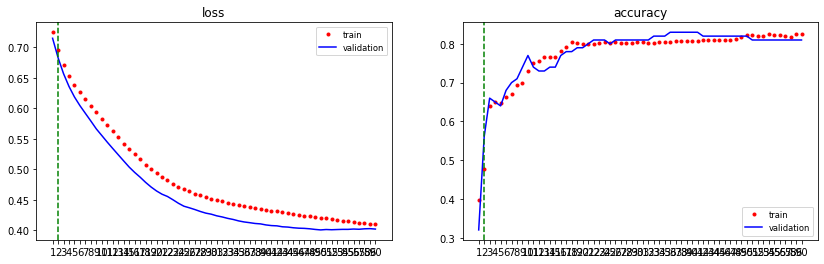

In [82]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("loss")
plt.plot(epochs,loss_values,".r", label='train',)
plt.plot(epochs,val_loss,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)

plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(epochs,accuracy,".r", label='train')
plt.plot(epochs,val_accuracy,"-b", label='validation')
plt.legend(fontsize='small')
plt.axvline(2,color='g',linestyle='--')
plt.xticks(epochs)
plt.show()

In [83]:
result = model.evaluate(test_data,test_label)

100/100 [==============================] - 0s 43us/sample - loss: 0.3446 - accuracy: 0.8800


In [84]:
print("test_loss:",result[0])
print("test_accuracy:",result[1])

test_loss: 0.3446058571338654
test_accuracy: 0.88


In [85]:
preprocessed_data.head()

,survived,pclass,age,sibsp,parch,alone,fare,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,-0.527298,1,0,0,-0.516017,0,0,1,0,1,0
1,1,1,0.576688,1,0,0,0.693558,1,0,0,0,0,1
2,1,3,-0.251301,0,0,1,-0.503267,0,0,1,0,0,1
3,1,1,0.369691,1,0,0,0.350080,0,0,1,0,0,1
4,0,3,0.369691,0,0,1,-0.500905,0,0,1,0,1,0


In [142]:
changmin = np.array([1,np.random.normal(),0,1,0,np.random.normal(),0,1,0,0,1,0])

In [143]:
changmin

array([ 1.        , -2.22925106,  0.        ,  1.        ,  0.        ,
       -0.02679882,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ])

In [144]:
changmin = changmin.reshape([1,12])

In [145]:
model.predict(changmin)

array([[0.6972177]], dtype=float32)

age 맞추기
- adult, child

In [167]:
preprocessed_data = titanic_data.loc[:,['age', 'pclass','survived',
                                       'sibsp', 'parch','alone','fare','who']]

In [168]:
preprocessed_data = pd.get_dummies(preprocessed_data)

In [169]:
preprocessed_data["fare"] = (preprocessed_data["fare"] - preprocessed_data["fare"].mean())/(preprocessed_data["fare"].std())

In [170]:
nan_age_data = preprocessed_data.isnull()

nan_age_data = preprocessed_data[nan_age_data.age == True]

nan_age_data.head()

preprocessed_data = preprocessed_data.dropna()

In [171]:
preprocessed_data.count()[0]

714

(array([  0.,   0.,   0.,   0., 531., 133.,  23.,   9.,  15.,   0.]),
 array([-6. , -4.8, -3.6, -2.4, -1.2,  0. ,  1.2,  2.4,  3.6,  4.8,  6. ]),
 <a list of 10 Patch objects>)

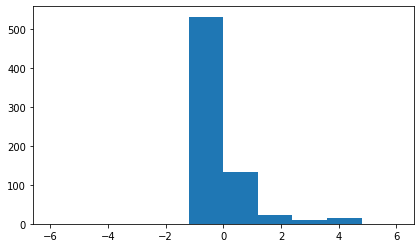

In [172]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(preprocessed_data["fare"],bins=10,range=(-6,6))

In [173]:
child = preprocessed_data.loc[preprocessed_data.who_child==1]
adult_man = preprocessed_data.loc[preprocessed_data.who_man==1]
adult_woman = preprocessed_data.loc[preprocessed_data.who_woman==1]

In [174]:
child = child.iloc[:,:7]

In [175]:
adult_man = adult_man.iloc[:,:7]
adult_woman = adult_woman.iloc[:,:7]

In [176]:
print("아이들 명수:",child.shape[0])
print("아이들 연령 분포:\n",np.sort(child["age"].unique()))

아이들 명수: 83
아이들 연령 분포:
 [ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.  ]


In [177]:
child_data = child.iloc[:,1:].values
child_label = child["age"].values

child_train_data = child_data[:73]
child_test_data = child_data[73:]

child_train_label = child_label[:73]
child_test_label = child_label[73:]

In [178]:
print("남자 명수:",adult_man.shape[0])
print("남자 연령 분포:\n",np.sort(adult_man["age"].unique()))

남자 명수: 413
남자 연령 분포:
 [16.  17.  18.  19.  20.  20.5 21.  22.  23.  23.5 24.  24.5 25.  26.
 27.  28.  28.5 29.  30.  30.5 31.  32.  32.5 33.  34.  34.5 35.  36.
 36.5 37.  38.  39.  40.  40.5 41.  42.  43.  44.  45.  45.5 46.  47.
 48.  49.  50.  51.  52.  54.  55.  55.5 56.  57.  58.  59.  60.  61.
 62.  64.  65.  66.  70.  70.5 71.  74.  80. ]


In [179]:
adult_man_data = adult_man.iloc[:,1:].values
adult_man_train_data = adult_man_data[:350]
adult_man_test_data = adult_man_data[350:]


adult_man_label = adult_man["age"].values
adult_man_train_label = adult_man_label[:350]
adult_man_test_label = adult_man_label[350:]

In [180]:
print("여자 명수:",adult_woman.shape[0])
print("여자 연령 분포:\n",np.sort(adult_woman["age"].unique()))

여자 명수: 218
여자 연령 분포:
 [16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
 30.  30.5 31.  32.  32.5 33.  34.  35.  36.  37.  38.  39.  40.  41.
 42.  43.  44.  45.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
 57.  58.  60.  62.  63. ]


In [181]:
adult_woman_data = adult_woman.iloc[:,1:].values
adult_woman_train_data = adult_woman_data[:180]
adult_woman_test_data = adult_woman_data[180:]

adult_woman_label = adult_woman["age"].values
adult_woman_train_label = adult_woman_label[:180]
adult_woman_test_label = adult_woman_label[180:]

In [212]:
train_size = adult_man_train_data.shape[1]
batch_size = 64
learning_rate = 0.001

In [213]:
model = models.Sequential()

In [214]:
model.add(layers.Dense(36,activation='relu',input_shape=(train_size,)))
model.add(layers.Dense(36,activation='relu'))
model.add(layers.Dense(18,activation='relu'))
model.add(layers.Dense(1))

In [215]:
print("parameter(weight)개수")
for i in range(len(model.weights)):
    print(model.weights[i].shape)

parameter(weight)개수
(6, 36)
(36,)
(36, 36)
(36,)
(36, 18)
(18,)
(18, 1)
(1,)


In [216]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.mse,metrics=['mae']
)

In [217]:
adult_man_train_data.shape

(350, 6)

In [221]:
man_history = model.fit(adult_man_train_data,adult_man_train_label,epochs=70,batch_size=70)

Train on 350 samples
Epoch 1/70
350/350 [==============================] - 0s 26us/sample - loss: 122.5945 - mae: 8.7984
Epoch 2/70
350/350 [==============================] - 0s 20us/sample - loss: 122.5511 - mae: 8.7738
Epoch 3/70
350/350 [==============================] - 0s 19us/sample - loss: 122.4266 - mae: 8.7631
Epoch 4/70
350/350 [==============================] - 0s 19us/sample - loss: 122.4471 - mae: 8.7939
Epoch 5/70
350/350 [==============================] - 0s 23us/sample - loss: 122.2683 - mae: 8.7849
Epoch 6/70
350/350 [==============================] - 0s 23us/sample - loss: 122.3471 - mae: 8.7449
Epoch 7/70
350/350 [==============================] - 0s 25us/sample - loss: 122.3248 - mae: 8.7729
Epoch 8/70
350/350 [==============================] - 0s 26us/sample - loss: 122.1455 - mae: 8.7986
Epoch 9/70
350/350 [==============================] - 0s 22us/sample - loss: 122.0478 - mae: 8.7546
Epoch 10/70
350/350 [==============================] - 0s 23us/sample - loss: 1

In [222]:
model.evaluate(adult_man_test_data,adult_man_test_label)

63/63 [==============================] - 0s 1ms/sample - loss: 144.2735 - mae: 9.3480


[144.27347722129215, 9.348024]

In [223]:
woman_history = model.fit(adult_woman_train_data,adult_woman_train_label,epochs=70,batch_size=60)

Train on 180 samples
Epoch 1/70
180/180 [==============================] - 0s 776us/sample - loss: 121.3800 - mae: 8.5899
Epoch 2/70
180/180 [==============================] - 0s 23us/sample - loss: 119.2377 - mae: 8.5175
Epoch 3/70
180/180 [==============================] - 0s 24us/sample - loss: 116.4501 - mae: 8.4373
Epoch 4/70
180/180 [==============================] - 0s 26us/sample - loss: 113.9196 - mae: 8.3514
Epoch 5/70
180/180 [==============================] - 0s 27us/sample - loss: 111.3543 - mae: 8.2522
Epoch 6/70
180/180 [==============================] - 0s 26us/sample - loss: 109.0989 - mae: 8.2484
Epoch 7/70
180/180 [==============================] - 0s 33us/sample - loss: 107.0286 - mae: 8.2360
Epoch 8/70
180/180 [==============================] - 0s 29us/sample - loss: 105.7934 - mae: 8.1858
Epoch 9/70
180/180 [==============================] - 0s 33us/sample - loss: 104.6750 - mae: 8.0995
Epoch 10/70
180/180 [==============================] - 0s 29us/sample - loss: 

In [224]:
child_history = model.fit(child_train_data,child_train_label,epochs=100,batch_size=30)

Train on 73 samples
Epoch 1/100
73/73 [==============================] - 0s 2ms/sample - loss: 356.7351 - mae: 17.1804
Epoch 2/100
73/73 [==============================] - 0s 60us/sample - loss: 93.4112 - mae: 7.7478
Epoch 3/100
73/73 [==============================] - 0s 59us/sample - loss: 34.6792 - mae: 4.5461
Epoch 4/100
73/73 [==============================] - 0s 62us/sample - loss: 54.8629 - mae: 6.1518
Epoch 5/100
73/73 [==============================] - 0s 69us/sample - loss: 64.0380 - mae: 6.8866
Epoch 6/100
73/73 [==============================] - 0s 63us/sample - loss: 60.3041 - mae: 6.5960
Epoch 7/100
73/73 [==============================] - 0s 69us/sample - loss: 50.4040 - mae: 5.8291
Epoch 8/100
73/73 [==============================] - 0s 80us/sample - loss: 39.0286 - mae: 4.9101
Epoch 9/100
73/73 [==============================] - 0s 75us/sample - loss: 29.5888 - mae: 4.1675
Epoch 10/100
73/73 [==============================] - 0s 97us/sample - loss: 22.1174 - mae: 3.672

In [225]:
nan_age_data

,age,pclass,survived,sibsp,parch,alone,fare,who_child,who_man,who_woman
5,NaN,3,0,0,0,1,-0.477848,0,1,0
17,NaN,2,1,0,0,1,-0.386454,0,1,0
19,NaN,3,1,0,0,1,-0.502666,0,0,1
26,NaN,3,0,0,0,1,-0.502666,0,1,0
28,NaN,3,1,0,0,1,-0.489502,0,0,1
29,NaN,3,0,0,0,1,-0.489167,0,1,0
31,NaN,1,1,1,0,0,2.300437,0,0,1
32,NaN,3,1,0,0,1,-0.492101,0,0,1
36,NaN,3,1,0,0,1,-0.502582,0,1,0
42,NaN,3,0,0,0,1,-0.489167,0,1,0


In [226]:
nan_predict_data = (nan_age_data.iloc[:,1:7])

In [227]:
nan_predict_data = nan_predict_data.values

In [228]:
result = model.predict(nan_predict_data)

In [229]:
nan_age_index = np.array(titanic_data[titanic_data["age"].isnull()].index)

In [230]:
nan_age_column = np.array(titanic_data[titanic_data["age"].isnull()].columns)

In [231]:
titanic_data = titanic_data.values

In [232]:
titanic_data[nan_age_index,3:4] = result

In [233]:
titanic_data = pd.DataFrame(titanic_data,columns=nan_age_column)

In [234]:
nan_age_index

array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888])

In [1253]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.25,S,Third,man,True,Southampton,no,0
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,0
2,1,3,female,26,0,0,7.925,S,Third,woman,False,Southampton,yes,1
3,1,1,female,35,1,0,53.1,S,First,woman,False,Southampton,yes,0
4,0,3,male,35,0,0,8.05,S,Third,man,True,Southampton,no,1
5,0,3,male,13.64,0,0,8.4583,Q,Third,man,True,Queenstown,no,1
6,0,1,male,54,0,0,51.8625,S,First,man,True,Southampton,no,1
7,0,3,male,2,3,1,21.075,S,Third,child,False,Southampton,no,0
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,Southampton,yes,0
9,1,2,female,14,1,0,30.0708,C,Second,child,False,Cherbourg,yes,0


In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 144)               1872      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9280      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 11,945
Trainable params: 11,945
Non-trainable params: 0
_________________________________________________________________


In [195]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,1


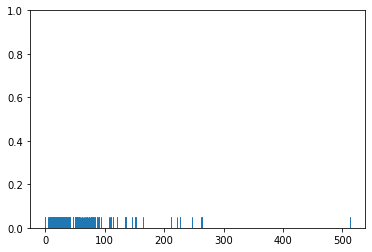

In [196]:
sns.rugplot(titanic_data['fare'])

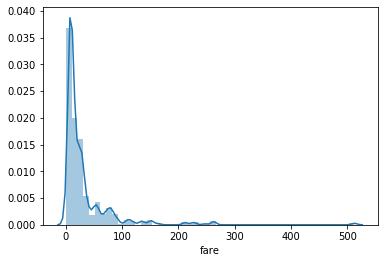

In [197]:
sns.distplot(titanic_data['fare'])

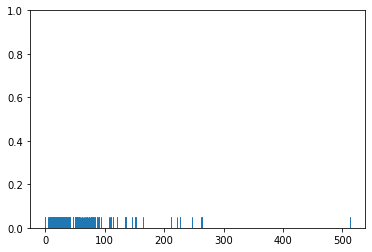

In [198]:
sns.rugplot(titanic_data['fare'])

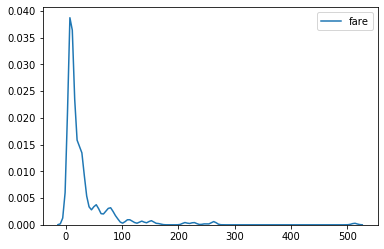

In [199]:
sns.kdeplot(titanic_data['fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

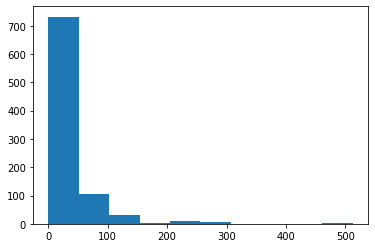

In [200]:
plt.hist(titanic_data['fare'])

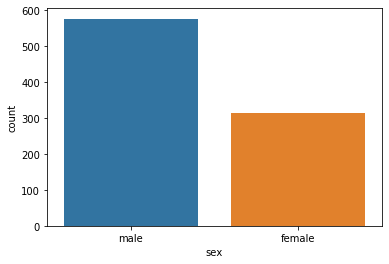

In [201]:
sns.countplot(x='sex',data=titanic_data)

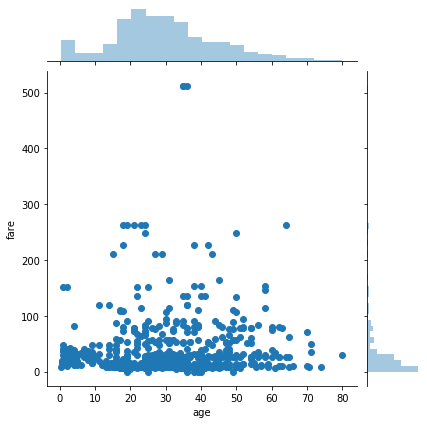

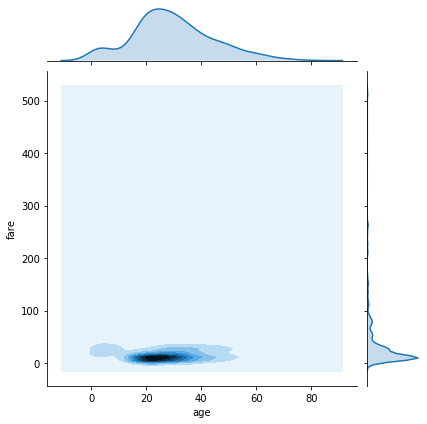

In [202]:

sns.jointplot('age','fare',data=titanic_data)

sns.jointplot('age','fare',data=titanic_data,kind='kde')

In [203]:
data = pd.pivot_table(data=titanic_data,index='survived',columns='sex',aggfunc='size')
data = titanic_data.pivot_table(index='sex',columns='survived',aggfunc='size')

In [204]:
data

survived,0,1
sex,,
female,81,233
male,468,109


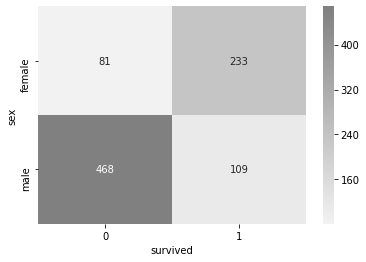

In [205]:
sns.heatmap(data,cmap=sns.light_palette("gray",as_cmap=True),annot=True,fmt="d")

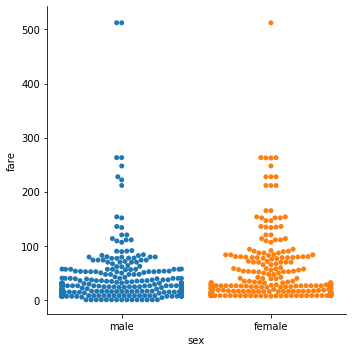

In [206]:
sns.catplot(x="sex",y="fare",data=titanic_data,kind="swarm")

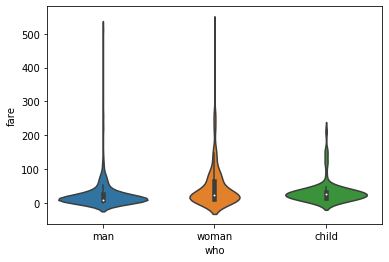

In [207]:
sns.violinplot(x="who",y="fare",data=titanic_data)

In [208]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,1


/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


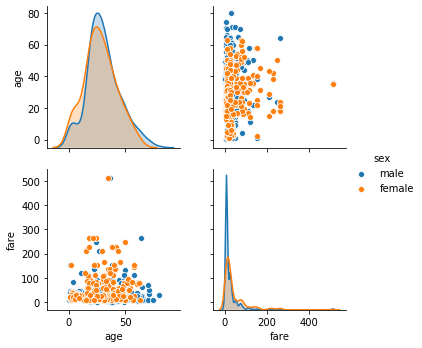

In [209]:
sns.pairplot(titanic_data.loc[:,['sex','age','fare']],hue='sex')

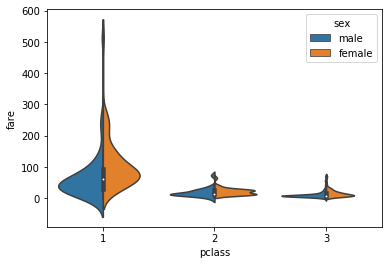

In [210]:
sns.violinplot(x='pclass',y='fare',data=titanic_data,hue='sex',split=True)